In [1]:
import torch
print("CUDA available:", torch.cuda.is_available())
print("GPU:", torch.cuda.get_device_name(0))


CUDA available: True
GPU: NVIDIA GeForce RTX 2050


In [2]:
import pandas as pd
import numpy as np

df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [3]:
df_train.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,9117000170,20150505T000000,268643,4,2.25,1810,9240,2.0,0,0,...,7,1810,0,1961,0,98055,47.4362,-122.187,1660,9240
1,6700390210,20140708T000000,245000,3,2.50,1600,2788,2.0,0,0,...,7,1600,0,1992,0,98031,47.4034,-122.187,1720,3605
2,7212660540,20150115T000000,200000,4,2.50,1720,8638,2.0,0,0,...,8,1720,0,1994,0,98003,47.2704,-122.313,1870,7455
3,8562780200,20150427T000000,352499,2,2.25,1240,705,2.0,0,0,...,7,1150,90,2009,0,98027,47.5321,-122.073,1240,750
4,7760400350,20141205T000000,232000,3,2.00,1280,13356,1.0,0,0,...,7,1280,0,1994,0,98042,47.3715,-122.074,1590,8071


In [4]:
df_train.shape


(16209, 21)

In [5]:
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16209 entries, 0 to 16208
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             16209 non-null  int64  
 1   date           16209 non-null  object 
 2   price          16209 non-null  int64  
 3   bedrooms       16209 non-null  int64  
 4   bathrooms      16209 non-null  float64
 5   sqft_living    16209 non-null  int64  
 6   sqft_lot       16209 non-null  int64  
 7   floors         16209 non-null  float64
 8   waterfront     16209 non-null  int64  
 9   view           16209 non-null  int64  
 10  condition      16209 non-null  int64  
 11  grade          16209 non-null  int64  
 12  sqft_above     16209 non-null  int64  
 13  sqft_basement  16209 non-null  int64  
 14  yr_built       16209 non-null  int64  
 15  yr_renovated   16209 non-null  int64  
 16  zipcode        16209 non-null  int64  
 17  lat            16209 non-null  float64
 18  long  

In [6]:
df_train.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.620900e+04,1.620900e+04,16209.00000,16209.000000,16209.000000,1.620900e+04,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000
mean,4.575771e+09,5.374703e+05,3.36782,2.113054,2073.274601,1.486767e+04,1.498828,0.006971,0.234253,3.407860,7.652971,1784.754396,288.520205,1971.152755,82.738108,98077.974767,47.560707,-122.214003,1983.152261,12735.572707
std,2.874661e+09,3.603036e+05,0.93327,0.765242,907.009491,3.882570e+04,0.543032,0.083206,0.763152,0.651553,1.171050,821.820844,438.598910,29.372698,397.861148,53.355282,0.138340,0.140093,681.905161,26933.162012
min,1.000102e+06,7.500000e+04,0.00000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.159300,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.200000e+05,3.00000,1.500000,1430.000000,5.004000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1952.000000,0.000000,98033.000000,47.472500,-122.328000,1480.000000,5098.000000
50%,3.904950e+09,4.500000e+05,3.00000,2.250000,1910.000000,7.599000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.572400,-122.230000,1840.000000,7620.000000
75%,7.304301e+09,6.400000e+05,4.00000,2.500000,2550.000000,1.063100e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2200.000000,560.000000,1997.000000,0.000000,98117.000000,47.678200,-122.125000,2360.000000,10053.000000
max,9.900000e+09,7.700000e+06,33.00000,8.000000,12050.000000,1.164794e+06,3.500000,1.000000,4.000000,5.000000,13.000000,8860.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


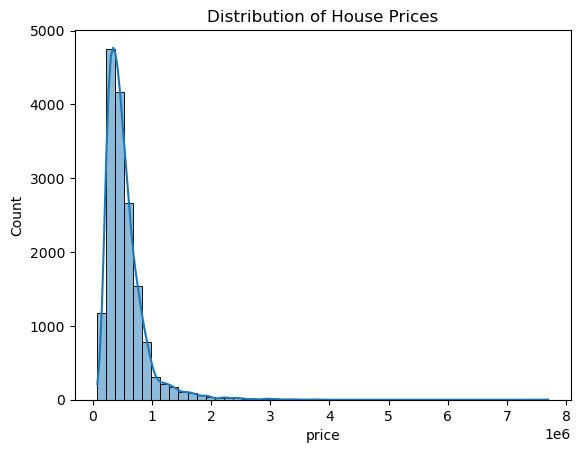

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df_train["price"], bins=50, kde=True)
plt.title("Distribution of House Prices")
plt.show()


In [8]:
df_train["price"].describe()


count    1.620900e+04
mean     5.374703e+05
std      3.603036e+05
min      7.500000e+04
25%      3.200000e+05
50%      4.500000e+05
75%      6.400000e+05
max      7.700000e+06
Name: price, dtype: float64

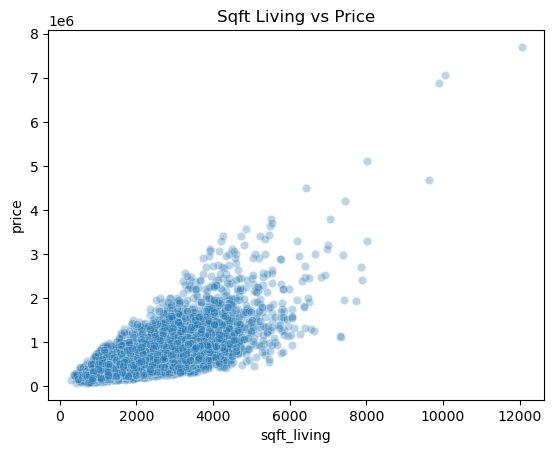

In [9]:
sns.scatterplot(x="sqft_living", y="price", data=df_train, alpha=0.3)
plt.title("Sqft Living vs Price")
plt.show()


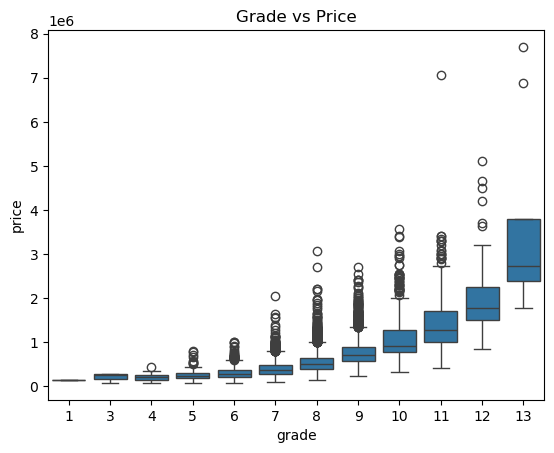

In [10]:
sns.boxplot(x="grade", y="price", data=df_train)
plt.title("Grade vs Price")
plt.show()


In [11]:
df_train.groupby("grade")["price"].median()


grade
1      142000.0
3      262000.0
4      211000.0
5      225000.0
6      275000.0
7      375000.0
8      508500.0
9      718000.0
10     910000.0
11    1266500.0
12    1785000.0
13    2731000.0
Name: price, dtype: float64

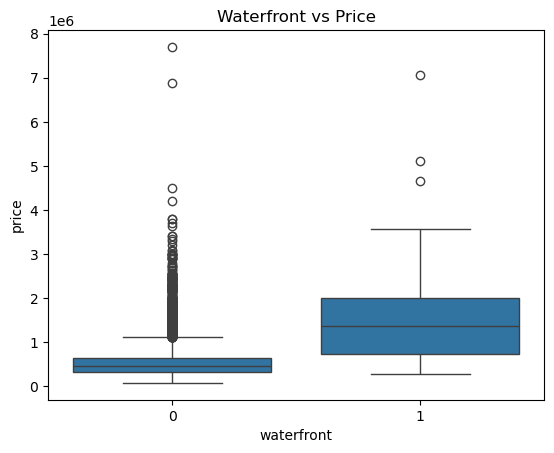

In [12]:
sns.boxplot(x="waterfront", y="price", data=df_train)
plt.title("Waterfront vs Price")
plt.show()

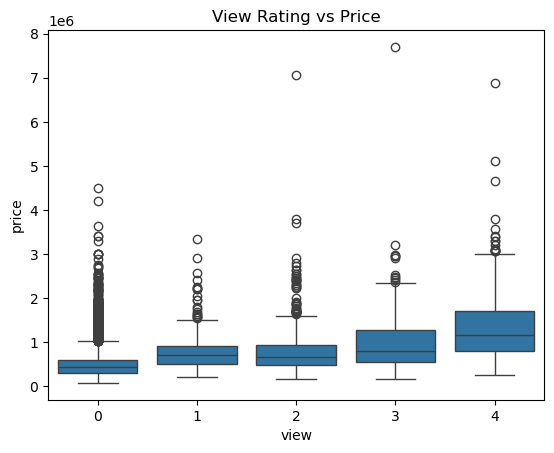

In [13]:
sns.boxplot(x="view", y="price", data=df_train)
plt.title("View Rating vs Price")
plt.show()


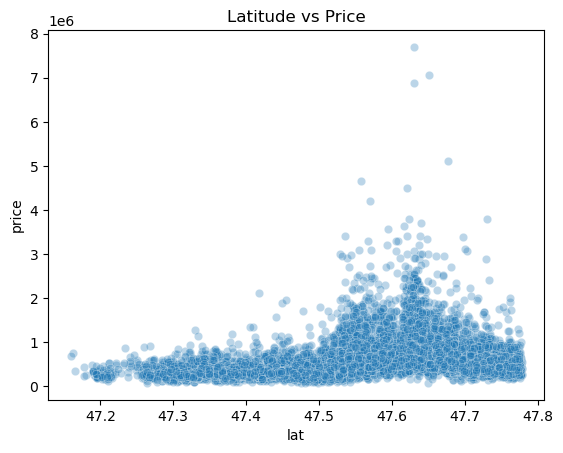

In [14]:
sns.scatterplot(x="lat", y="price", data=df_train, alpha=0.3)
plt.title("Latitude vs Price")
plt.show()


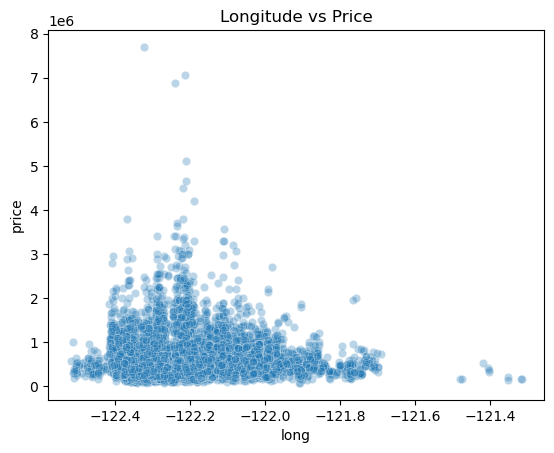

In [15]:
sns.scatterplot(x="long", y="price", data=df_train, alpha=0.3)
plt.title("Longitude vs Price")
plt.show()


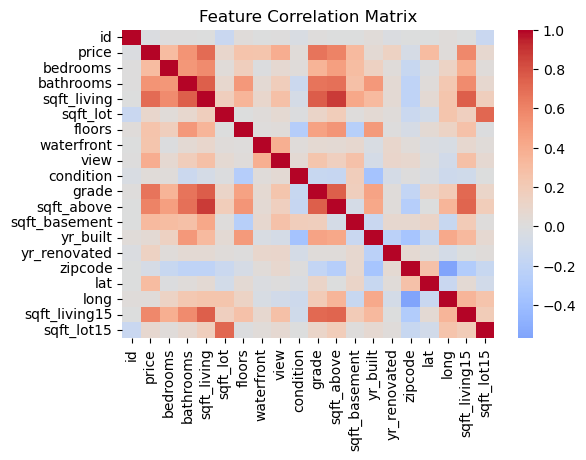

In [16]:
numeric_cols = df_train.select_dtypes(include=["int64", "float64"])

plt.figure(figsize=(6,4))
sns.heatmap(numeric_cols.corr(), cmap="coolwarm", center=0)
plt.title("Feature Correlation Matrix")
plt.show()


In [17]:
drop_cols = ["id", "date", "zipcode"]

df_train = df_train.drop(columns=drop_cols)
df_test  = df_test.drop(columns=drop_cols)



In [18]:
X = df_train.drop(columns=["price"])
y = np.log1p(df_train["price"])


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)



In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled   = scaler.transform(X_val)
X_test_scaled  = scaler.transform(df_test)



In [21]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=1.0)
model.fit(X_train_scaled, y_train)



,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [22]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_val_pred_log = model.predict(X_val_scaled)

y_val_pred = np.expm1(y_val_pred_log)
y_val_true = np.expm1(y_val)

rmse = mean_squared_error(y_val_true, y_val_pred)
r2 = r2_score(y_val_true, y_val_pred)

print("Validation RMSE:", rmse)
print("Validation R²:", r2)


Validation RMSE: 31112190943.160213
Validation R²: 0.7520715954331292


In [23]:
test_pred_log = model.predict(X_test_scaled)
test_pred = np.expm1(test_pred_log)


In [24]:
test_pred.shape  # should match len(df_test)


(5404,)

In [25]:
submission = pd.DataFrame({
    "prediction": test_pred
})

submission.to_csv("tabular_baseline_predictions.csv", index=False)


In [26]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(
    n_estimators=300,     # number of trees
    learning_rate=0.05,  # how much each tree corrects errors
    max_depth=4,         # depth of each tree
    random_state=42
)

gbr.fit(X_train, y_train)


,loss,'squared_error'
,learning_rate,0.05
,n_estimators,300
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,4
,min_impurity_decrease,0.0
,init,None


In [27]:
# Predict (log-scale)
y_val_pred_log = gbr.predict(X_val)

# Convert back to real prices
y_val_pred = np.expm1(y_val_pred_log)
y_val_true = np.expm1(y_val)

# Metrics
rmse = mean_squared_error(y_val_true, y_val_pred)
r2   = r2_score(y_val_true, y_val_pred)

print("Gradient Boosting RMSE:", rmse)
print("Gradient Boosting R²:", r2)


Gradient Boosting RMSE: 14668674207.834309
Gradient Boosting R²: 0.8831075252751016


In [28]:
test_pred_log = gbr.predict(df_test)
test_pred = np.expm1(test_pred_log)


In [29]:
submission = pd.DataFrame({
    "prediction": test_pred
})

submission.to_csv("gbr_predictions.csv", index=False)


In [30]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_val_true, y_val_pred)
nmae_mean = mae / np.mean(y_val_true)
print("Normalized MAE (0–1, mean-normalized):", nmae_mean)

Normalized MAE (0–1, mean-normalized): 0.12804687522783076


In [31]:
import numpy as np

mape = np.mean(np.abs((y_val_true - y_val_pred) / y_val_true)) * 100
print("Gradient Boosting MAPE (%):", mape)


Gradient Boosting MAPE (%): 12.571376511601384


(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

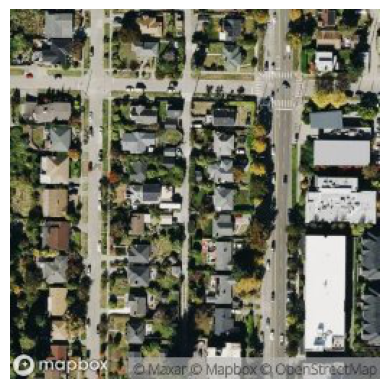

In [32]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("data/images/train/8542.png")
plt.imshow(img)
plt.axis("off")


(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

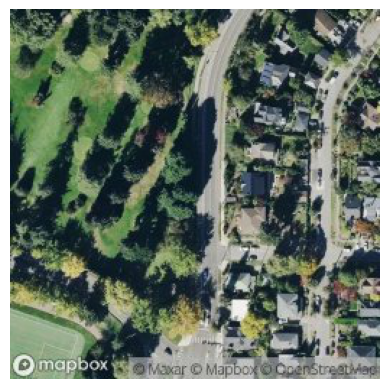

In [33]:
img = Image.open("data/images/test/1009.png")
plt.imshow(img)
plt.axis("off")

In [34]:
import os

IMAGE_DIR = "data/images/train"

image_files = sorted(os.listdir(IMAGE_DIR))
image_files[:10]


['0.png',
 '1.png',
 '10.png',
 '100.png',
 '1000.png',
 '10000.png',
 '10001.png',
 '10002.png',
 '10003.png',
 '10004.png']

In [35]:
import os
import re

valid_image_ids = set()

for f in os.listdir(IMAGE_DIR):
    if f.endswith(".png"):
        match = re.match(r"(\d+)", f)
        if match:
            valid_image_ids.add(int(match.group(1)))

len(valid_image_ids)

16139

In [36]:
df_train["image_id"] = df_train.index

In [37]:
mask = df_train["image_id"].isin(valid_image_ids)

print("Total rows:", len(df_train))
print("Rows with images:", mask.sum())
print("Rows without images:", (~mask).sum())

Total rows: 16209
Rows with images: 16139
Rows without images: 70


In [38]:
df_train_clean = df_train[mask].copy()


In [39]:
df_train_clean = df_train_clean.reset_index(drop=True)


In [40]:
for i in df_train_clean["image_id"].iloc[:10]:
    path = f"{IMAGE_DIR}/{i}.png"
    print(i, "→", os.path.exists(path))


0 → True
1 → True
2 → True
3 → True
4 → True
5 → True
6 → True
7 → True
8 → True
9 → True


In [41]:
df_train_clean["price"] = np.log1p(df_train_clean["price"])


In [42]:
assert len(df_train_clean) <= len(valid_image_ids)


In [43]:
from torchvision import transforms

train_image_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

val_image_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])


In [44]:
import torch

img = Image.open("data/images/train/0.png").convert("RGB")
img_tensor = train_image_transform(img)

print(img_tensor.shape)
print(img_tensor.min(), img_tensor.max())


torch.Size([3, 224, 224])
tensor(-2.0837) tensor(2.5703)


In [45]:
tabular_cols = [
    "bedrooms", "bathrooms", "sqft_living",
    "sqft_lot", "floors", "waterfront",
    "view", "condition", "grade",
    "sqft_above", "sqft_basement",
    "lat", "long"
]

In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_train_clean[tabular_cols] = scaler.fit_transform(
    df_train_clean[tabular_cols]
)


In [47]:
from torch.utils.data import Dataset
from PIL import Image
import os

class RealEstateTrainDataset(Dataset):
    def __init__(self, df, image_dir, tabular_cols, transform=None):
        self.df = df
        self.image_dir = image_dir
        self.tabular_cols = tabular_cols
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        # ----- Load image -----
        img_id = int(self.df.iloc[idx][ "image_id"])
        img_path = f"{self.image_dir}/{img_id}.png"

        image = Image.open(img_path).convert("RGB")

        if self.transform:
            image = self.transform(image)

        # ----- Load tabular features -----
        tabular = torch.tensor(
            self.df.iloc[idx][ self.tabular_cols].values,
            dtype=torch.float32
        )

        # ----- Load target (price) -----
        target = torch.tensor(
            self.df.iloc[idx]["price"],
            dtype=torch.float32
        )

        return image, tabular, target


In [48]:
# Try loading a few samples manually
import os
for i in [0, 10, 100, 500,1004,13567]:
    img_id = int(df_train_clean.iloc[i][ "image_id"])
    path = f"data/images/train/{img_id}.png"
    print(i, "→", path, os.path.exists(path))

0 → data/images/train/0.png True
10 → data/images/train/10.png True
100 → data/images/train/100.png True
500 → data/images/train/500.png True
1004 → data/images/train/1004.png True
13567 → data/images/train/13637.png True


In [49]:
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
import numpy as np

train_idx, val_idx = train_test_split(
    np.arange(len(df_train_clean)),
    test_size=0.2,
    random_state=42
)

In [50]:
train_dataset = RealEstateTrainDataset(
    df=df_train_clean.iloc[train_idx].reset_index(drop=True),
    image_dir="data/images/train",
    tabular_cols=tabular_cols,
    transform=train_image_transform
)

val_dataset = RealEstateTrainDataset(
    df=df_train_clean.iloc[val_idx].reset_index(drop=True),
    image_dir="data/images/train",
    tabular_cols=tabular_cols,
    transform=val_image_transform
)

In [51]:
import torch
import torch.nn as nn
from torchvision import models


In [52]:
# Load pretrained ResNet50
from torchvision.models import resnet50, ResNet50_Weights

resnet = models.resnet50(weights=ResNet50_Weights.DEFAULT)


In [53]:
# Remove final classification layer
resnet.fc = nn.Identity()

In [54]:
for param in resnet.parameters():
    param.requires_grad = False

In [55]:
resnet.eval()

with torch.no_grad():
    img = train_image_transform(Image.open("data/images/train/0.png").convert("RGB"))
    img = img.unsqueeze(0)  # add batch dimension
    embedding = resnet(img)

print(embedding.shape)

torch.Size([1, 2048])


In [56]:
class TabularEncoder(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.BatchNorm1d(256),
            nn.SiLU(),          # better than ReLU for regression
            nn.Dropout(0.1),

            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.SiLU(),
            nn.Dropout(0.1),

            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.SiLU(),

            nn.Linear(64, 32)
        )

    def forward(self, x):
        return self.net(x)



In [57]:
import torch.nn.functional as F
class MultimodalRegressor(nn.Module):
    def __init__(self, cnn, tabular_dim):
        super().__init__()

        self.cnn = cnn
        self.cnn_head = nn.Sequential(
            nn.Linear(2048, 256),
            nn.ReLU(),
            nn.Dropout(0.2),
        )
        self.tabular_net = TabularEncoder(tabular_dim)
        self.alpha = nn.Parameter(torch.tensor(0.7))

        # Final regression head
        self.regressor = nn.Sequential(
              nn.Linear(256 + 32 + 256, 256),
              nn.ReLU(),
              nn.Dropout(0.3),
              nn.Linear(256, 128),
              nn.ReLU(),
              nn.Dropout(0.2),
              nn.Linear(128, 1)
          )
        self._init_regressor_weights()

    def _init_regressor_weights(self):
        linears = [m for m in self.regressor if isinstance(m, nn.Linear)]
    
        for m in linears[:-1]:  # hidden layers
            nn.init.xavier_uniform_(m.weight, gain=0.01)
            nn.init.constant_(m.bias, 0.0)
    
        # final output layer
        nn.init.xavier_uniform_(linears[-1].weight, gain=0.001)
        nn.init.constant_(linears[-1].bias, 0.0)

    def forward(self, image, tabular):
        # Image features
        img_feat = self.cnn.conv1(image)
        img_feat = self.cnn.bn1(img_feat)
        img_feat = self.cnn.relu(img_feat)
        img_feat = self.cnn.maxpool(img_feat)
        
        img_feat = self.cnn.layer1(img_feat)
        img_feat = self.cnn.layer2(img_feat)
        img_feat = self.cnn.layer3(img_feat)
        img_feat = self.cnn.layer4(img_feat)   # (B, 2048, 7, 7)
        
        # Spatial aggregation
        img_feat = F.adaptive_avg_pool2d(img_feat, (1, 1)).flatten(1)  # (B, 2048)
        img_feat = self.cnn_head(img_feat)  # (B, 256)

        # Tabular features
        tab_feat = self.tabular_net(tabular)  # (B, 32)
        
        alpha = torch.sigmoid(self.alpha)
        img_scaled = self.alpha * img_feat
        tab_scaled = (1 - self.alpha) * tab_feat

        interaction = img_feat * tab_feat.mean(dim=1, keepdim=True)
        fused = torch.cat([img_scaled,tab_scaled,interaction], dim=1)

        # Price prediction
        out = self.regressor(fused)

        return out.squeeze(1)

In [58]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = MultimodalRegressor(
    cnn=resnet,
    tabular_dim=len(tabular_cols)
).to(device)

In [59]:
train_loader = DataLoader(
    train_dataset,
    batch_size=32,
    shuffle=True,
    num_workers=0,
    pin_memory=(device.type == "cuda")
)

val_loader = DataLoader(
    val_dataset,
    batch_size=32,
    shuffle=False,
    num_workers=0,
    pin_memory=(device.type == "cuda")
)

In [60]:
images, tabular, targets = next(iter(train_loader))

print(images.shape)     # (32, 3, 224, 224)
print(tabular.shape)    # (32, number_of_features)
print(targets.shape)    # (32,)

torch.Size([32, 3, 224, 224])
torch.Size([32, 13])
torch.Size([32])


In [61]:
images, tabular, targets = next(iter(train_loader))

images = images.to(device)
tabular = tabular.to(device)

with torch.no_grad():
    preds = model(images, tabular)

print(preds.shape)

torch.Size([32])


In [62]:
import torch.nn as nn

criterion = nn.SmoothL1Loss(beta=0.5)


In [63]:
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau

optimizer = optim.Adam(
    filter(lambda p: p.requires_grad, model.parameters()),
    lr=1e-3  # Small starting LR
)

scheduler = ReduceLROnPlateau(
    optimizer,
    mode='min',
    factor=0.5,        # Cut LR in half
    patience=2,        # After 2 epochs without improvement
    min_lr=1e-8,       # Don't go below this
    threshold=1e-4
)


In [64]:
def train_one_epoch(model, loader, optimizer, criterion, device):

    model.train()
    total_loss = 0.0

    for batch_idx, (images, tabular, targets) in enumerate(loader):

        images = images.to(device)
        tabular = tabular.to(device)
        targets = targets.to(device)

        optimizer.zero_grad()
        preds = model(images, tabular)

        # FORCE SHAPE MATCH
        preds = preds.squeeze(-1)
        loss = criterion(preds, targets)
        if torch.isnan(loss) or torch.isinf(loss):
            print(f"⚠️ Invalid loss at batch {batch_idx}, skipping")
            continue

        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()

        total_loss += loss.item() * images.size(0)

    return total_loss / len(loader.dataset)

In [65]:
def validate(model, loader, criterion, device):
    model.eval()
    total_loss = 0.0

    with torch.no_grad():
        for images, tabular, targets in loader:
            images = images.to(device)
            tabular = tabular.to(device)
            targets = targets.to(device)

            preds = model(images, tabular)
            preds = preds.squeeze(-1)
            loss = criterion(preds, targets)

            total_loss += loss.item() * images.size(0)

    return total_loss / len(loader.dataset)

In [66]:
print(next(model.parameters()).device)


cuda:0


In [67]:
# Test one forward-backward pass
model.train()
images, tabular, targets = next(iter(train_loader))
images, tabular, targets = images.to(device), tabular.to(device), targets.to(device)

preds = model(images, tabular)
loss = criterion(preds, targets)
loss.backward()

# Check gradients
max_grad = 0
for name, param in model.named_parameters():
    if param.grad is not None:
        grad_norm = param.grad.norm().item()
        max_grad = max(max_grad, grad_norm)
        if grad_norm > 10:
            print(f"⚠️ Large gradient in {name}: {grad_norm:.2f}")

print(f"Max gradient norm: {max_grad:.4f}")

Max gradient norm: 1.0000


Log price statistics:
count    16139.000000
mean        13.045246
std          0.523871
min         11.225257
25%         12.679200
50%         13.017005
75%         13.369225
max         15.856731
Name: price, dtype: float64

Min: 11.2253
Max: 15.8567
Range: 4.6315

Outliers (±3σ): 123 samples
Outlier values: [14.74570459 11.3504183  14.71825029 15.03781461 14.71159899 14.62644122
 14.78249478 15.03928628 14.91412318 14.88125559 15.15051189 14.66566191
 14.72376952 15.7703098  14.88022164 15.00943333 15.74485584 14.87676741
 14.64842012 14.73180169 15.08723574 15.10611994 14.9084404  14.8087627
 14.69097971 14.91412318 14.67713431 14.9799109  11.22525673 11.28979441
 14.69097971 11.40757606 15.15051189 14.75356317 14.74688732 15.04480046
 15.1265427  15.85673102 14.80132773 14.71159899 15.02297755 14.93555845
 14.8734748  14.72578362 14.61751259 14.93718845 14.81797935 14.69097971
 14.64842012 14.82711183 14.76136048 14.97866168 14.94691299 11.4616427
 11.4616427  14.71485898 14.64318

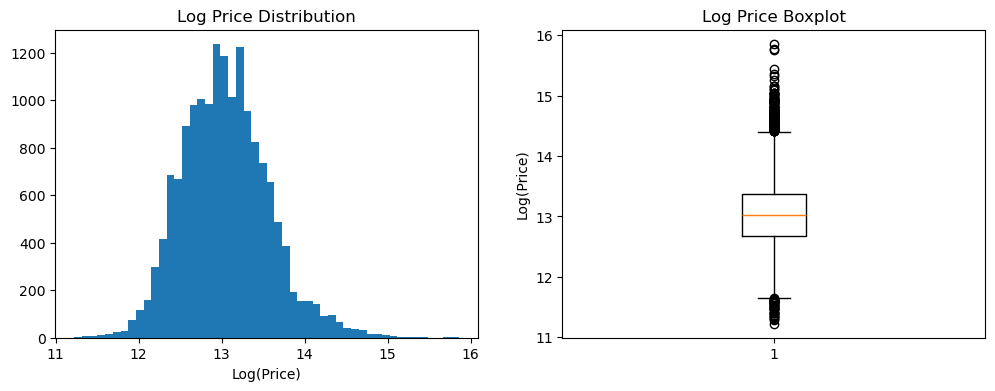

In [68]:
import numpy as np
import matplotlib.pyplot as plt

# Check log price distribution
log_prices = (df_train_clean['price'])

print("Log price statistics:")
print(log_prices.describe())
print(f"\nMin: {log_prices.min():.4f}")
print(f"Max: {log_prices.max():.4f}")
print(f"Range: {log_prices.max() - log_prices.min():.4f}")

# Check for extreme outliers (> 3 std from mean)
mean = log_prices.mean()
std = log_prices.std()
outliers = log_prices[(log_prices < mean - 3*std) | (log_prices > mean + 3*std)]

print(f"\nOutliers (±3σ): {len(outliers)} samples")
if len(outliers) > 0:
    print(f"Outlier values: {outliers.values}")

# Visualize
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(log_prices, bins=50)
plt.title('Log Price Distribution')
plt.xlabel('Log(Price)')

plt.subplot(1, 2, 2)
plt.boxplot(log_prices)
plt.title('Log Price Boxplot')
plt.ylabel('Log(Price)')
plt.show()

In [69]:
import copy
best_val_loss = float("inf")
best_state = None
num_epochs = 10

for epoch in range(num_epochs):
    train_loss = train_one_epoch(
        model, train_loader, optimizer, criterion, device
    )

    val_loss = validate(
        model, val_loader, criterion, device
    )
    scheduler.step(val_loss)

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_state = copy.deepcopy(model.state_dict())

    print(
        f"Epoch {epoch+1}/{num_epochs} | "
        f"Train MSmoothL1Loss: {train_loss:.4f} | "
        f"Val SmoothL1Loss: {val_loss:.4f}"
    )

# restore best model
model.load_state_dict(best_state)
print("Best Val SmoothL1Loss:", best_val_loss)


Epoch 1/10 | Train MSmoothL1Loss: 2.1411 | Val SmoothL1Loss: 0.7780
Epoch 2/10 | Train MSmoothL1Loss: 1.1822 | Val SmoothL1Loss: 0.6122
Epoch 3/10 | Train MSmoothL1Loss: 1.0517 | Val SmoothL1Loss: 0.4183
Epoch 4/10 | Train MSmoothL1Loss: 0.8473 | Val SmoothL1Loss: 0.2543
Epoch 5/10 | Train MSmoothL1Loss: 0.7709 | Val SmoothL1Loss: 0.1550
Epoch 6/10 | Train MSmoothL1Loss: 0.7486 | Val SmoothL1Loss: 0.3569
Epoch 7/10 | Train MSmoothL1Loss: 0.7225 | Val SmoothL1Loss: 0.1474
Epoch 8/10 | Train MSmoothL1Loss: 0.7086 | Val SmoothL1Loss: 0.1137
Epoch 9/10 | Train MSmoothL1Loss: 0.6428 | Val SmoothL1Loss: 0.1030
Epoch 10/10 | Train MSmoothL1Loss: 0.6418 | Val SmoothL1Loss: 0.0893
Best Val SmoothL1Loss: 0.0892891104401192


In [70]:

model.eval()


MultimodalRegressor(
  (cnn): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
  

In [71]:
import torch

y_true = []
y_pred = []

with torch.no_grad():
    for images, tabular, targets in val_loader:
        images = images.to(device)
        tabular = tabular.to(device)
        targets = targets.to(device)

        preds = model(images, tabular)   # log(price)

        y_true.append(targets.cpu())
        y_pred.append(preds.cpu())

y_true = torch.cat(y_true)   # log(price)
y_pred = torch.cat(y_pred)   # log(price)

In [72]:
y_true_np = y_true.cpu().numpy()
y_pred_np = y_pred.cpu().numpy()

In [73]:
y_true_price = np.expm1(y_true_np)
y_pred_price = np.expm1(y_pred_np)

In [74]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rmse = np.sqrt(mean_squared_error(y_true_price, y_pred_price))

mae = mean_absolute_error(y_true_price, y_pred_price)

r2 = r2_score(
    y_true_price, y_pred_price
)

print("Multimodal RMSE:", rmse)
print("Multimodal MAE :", mae)
print("Multimodal R²  :", r2)


Multimodal RMSE: 296131.2850476964
Multimodal MAE : 137728.28125
Multimodal R²  : 0.35479670763015747


In [75]:
from sklearn.metrics import r2_score

r2_log = r2_score(
    y_true.cpu().numpy(),
    y_pred.cpu().numpy()
)

print("Multimodal R² (log-price):", r2_log)


Multimodal R² (log-price): 0.6214870810508728


In [76]:
print(best_state is None)


False


In [77]:
print("y_true mean:", y_true.mean().item())
print("y_pred mean:", y_pred.mean().item())
print("y_true std :", y_true.std().item())
print("y_pred std :", y_pred.std().item())


y_true mean: 13.047433853149414
y_pred mean: 12.948049545288086
y_true std : 0.5254135131835938
y_pred std : 0.3839185833930969


In [78]:
print(torch.isnan(y_pred).sum())
print(torch.isinf(y_pred).sum())


tensor(0)
tensor(0)


In [79]:
for param in model.cnn.layer4.parameters():
    param.requires_grad = True

# Keep earlier layers frozen
for param in model.cnn.layer1.parameters():
    param.requires_grad = False
for param in model.cnn.layer2.parameters():
    param.requires_grad = False
for param in model.cnn.layer3.parameters():
    param.requires_grad = False


In [80]:
import torch.nn as nn

for m in model.cnn.modules():
    if isinstance(m, nn.BatchNorm2d):
        m.eval()


In [81]:
trainable = sum(p.requires_grad for p in model.parameters())
total = sum(1 for _ in model.parameters())

print(f"Trainable params: {trainable} / {total}")


Trainable params: 53 / 182


In [82]:
optimizer = torch.optim.Adam([
    {
        "params": model.cnn.layer4.parameters(),
        "lr": 1e-4      # VERY SMALL for CNN
    },
    {
        "params": model.tabular_net.parameters(),
        "lr": 1e-3
    },
    {
        "params": model.regressor.parameters(),
        "lr": 1e-3
    }
])

scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer,
    mode="min",
    factor=0.5,
    patience=1,
    min_lr=1e-6
)

In [83]:
criterion = nn.SmoothL1Loss(beta=0.5)


In [84]:
num_epochs = 8
best_val_loss = float("inf")
best_state = None

for epoch in range(num_epochs):
    train_loss = train_one_epoch(
        model, train_loader, optimizer, criterion, device
    )

    val_loss = validate(
        model, val_loader, criterion, device
    )
    scheduler.step(val_loss)

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_state = copy.deepcopy(model.state_dict())

    print(
        f"[Fine-tune] Epoch {epoch+1}/{num_epochs} | "
        f"Train SmoothL1Loss: {train_loss:.4f} | "
        f"Val SmoothL1Loss: {val_loss:.4f}"
    )

model.load_state_dict(best_state)


[Fine-tune] Epoch 1/8 | Train SmoothL1Loss: 0.5970 | Val SmoothL1Loss: 0.1588
[Fine-tune] Epoch 2/8 | Train SmoothL1Loss: 0.5609 | Val SmoothL1Loss: 0.1145
[Fine-tune] Epoch 3/8 | Train SmoothL1Loss: 0.5246 | Val SmoothL1Loss: 0.0708
[Fine-tune] Epoch 4/8 | Train SmoothL1Loss: 0.4831 | Val SmoothL1Loss: 0.0739
[Fine-tune] Epoch 5/8 | Train SmoothL1Loss: 0.4547 | Val SmoothL1Loss: 0.0515
[Fine-tune] Epoch 6/8 | Train SmoothL1Loss: 0.4170 | Val SmoothL1Loss: 0.1433
[Fine-tune] Epoch 7/8 | Train SmoothL1Loss: 0.3967 | Val SmoothL1Loss: 0.0510
[Fine-tune] Epoch 8/8 | Train SmoothL1Loss: 0.3833 | Val SmoothL1Loss: 0.1108


<All keys matched successfully>

In [85]:
model.eval()

y_true = []
y_pred = []

with torch.no_grad():
    for images, tabular, targets in val_loader:
        images = images.to(device)
        tabular = tabular.to(device)
        targets = targets.to(device)

        preds = model(images, tabular)

        y_true.append(targets.cpu())
        y_pred.append(preds.cpu())

y_true = torch.cat(y_true)
y_pred = torch.cat(y_pred)


In [86]:
print("y_true mean:", y_true.mean().item())
print("y_pred mean:", y_pred.mean().item())
print("y_true std :", y_true.std().item())
print("y_pred std :", y_pred.std().item())


y_true mean: 13.047433853149414
y_pred mean: 13.067580223083496
y_true std : 0.5254135131835938
y_pred std : 0.4158917963504791


In [87]:
from sklearn.metrics import r2_score

r2_log = r2_score(
    y_true.numpy(),
    y_pred.numpy()
)

print("Multimodal R² (log-price):", r2_log)


Multimodal R² (log-price): 0.8105806708335876


In [88]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_true_price = np.expm1(y_true.numpy())
y_pred_price = np.expm1(y_pred_np)

rmse = np.sqrt(mean_squared_error(y_true_price, y_pred_price))
mae  = mean_absolute_error(y_true_price, y_pred_price)

print("RMSE:", rmse)
print("MAE :", mae)


RMSE: 296131.2850476964
MAE : 137728.28125


In [89]:
import os

IMAGE_DIR_test = "data/images/test"

image_files_test = sorted(os.listdir(IMAGE_DIR_test))
image_files_test[:10]

['.ipynb_checkpoints',
 '0.png',
 '1.png',
 '10.png',
 '100.png',
 '1000.png',
 '1001.png',
 '1002.png',
 '1003.png',
 '1004.png']

In [90]:
import os
import re

valid_image_ids_test = set()

for f in os.listdir(IMAGE_DIR_test):
    if f.endswith(".png"):
        match = re.match(r"(\d+)", f)
        if match:
            valid_image_ids_test.add(int(match.group(1)))

len(valid_image_ids_test)

5404

In [91]:
df_test["image_id"] = df_test.index

In [92]:
mask_test = df_test["image_id"].isin(valid_image_ids_test)

print("Total rows:", len(df_test))
print("Rows with images:", mask_test.sum())
print("Rows without images:", (~mask_test).sum())

Total rows: 5404
Rows with images: 5404
Rows without images: 0


In [93]:
df_test_clean = df_test[mask_test].copy()

In [94]:
df_test_clean = df_test_clean.reset_index(drop=True)

In [95]:
# DO NOT refit scaler
df_test_clean[tabular_cols] = scaler.transform(
    df_test_clean[tabular_cols]
)

In [96]:
class RealEstateTestDataset(Dataset):
    def __init__(self, df, image_dir, tabular_cols, transform=None):
        self.df = df.reset_index(drop=True)
        self.image_dir = image_dir
        self.tabular_cols = tabular_cols
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        img_id = int(self.df.iloc[idx]["image_id"])
        img_path = f"{self.image_dir}/{img_id}.png"

        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)

        tabular = torch.tensor(
            self.df.iloc[idx][self.tabular_cols].values,
            dtype=torch.float32
        )

        return image, tabular, img_id


In [97]:
test_dataset = RealEstateTestDataset(
    df=df_test_clean,
    image_dir="data/images/test",
    tabular_cols=tabular_cols,
    transform=val_image_transform  # ❗ no augmentation
)

test_loader = DataLoader(
    test_dataset,
    batch_size=32,
    shuffle=False,
    num_workers=0,
    pin_memory=(device.type == "cuda")
)


In [114]:
import numpy as np
import pandas as pd

image_ids = []
pred_prices = []

with torch.no_grad():
    for images, tabular, img_ids in test_loader:
        images = images.to(device)
        tabular = tabular.to(device)

        preds = model(images, tabular)          # log(price)
        preds = preds.cpu().numpy()

        preds = np.expm1(preds)                 # inverse log

        pred_prices.extend(preds)
        image_ids.extend(img_ids.numpy())


In [115]:
submission = pd.DataFrame({
    "image_id": image_ids,
    "price": pred_prices
})

submission.to_csv("test_predictions.csv", index=False)


In [116]:
print(submission.head())
print(submission.describe())


   image_id         price
0         0  4.221939e+05
1         1  8.147390e+05
2         2  1.046425e+06
3         3  1.691101e+06
4         4  6.871514e+05
          image_id         price
count  5404.000000  5.404000e+03
mean   2701.500000  5.293670e+05
std    1560.144758  3.358958e+05
min       0.000000  1.748887e+05
25%    1350.750000  3.552115e+05
50%    2701.500000  4.677787e+05
75%    4052.250000  6.075382e+05
max    5403.000000  6.765239e+06


In [101]:
target_layer = model.cnn.layer4


In [102]:
# Take one sample
image = images[0].clone().detach().unsqueeze(0).requires_grad_(True)

# Zero-out tabular features (to isolate image contribution)
tabular_sample = torch.zeros_like(tabular[0]).unsqueeze(0)

image = image.to(device)
tabular_sample = tabular_sample.to(device)



In [103]:
activations = None

def forward_hook(module, input, output):
    global activations
    activations = output

fwd_handle = target_layer.register_forward_hook(forward_hook)

In [104]:
gradients = None

def backward_hook(module, grad_input, grad_output):
    global gradients
    gradients = grad_output[0]

bwd_handle = target_layer.register_full_backward_hook(backward_hook)

In [105]:
model.eval()
for m in model.modules():
    if isinstance(m, nn.BatchNorm2d):
        m.eval()

model.zero_grad()

with torch.set_grad_enabled(True):
    pred = model(image, tabular_sample)
    pred.backward()


In [106]:
print("Activations is None:", activations is None)
print("Gradients is None:", gradients is None)
print("Activations shape:", activations.shape)
print("Gradients shape:", gradients.shape)


Activations is None: False
Gradients is None: False
Activations shape: torch.Size([1, 2048, 7, 7])
Gradients shape: torch.Size([1, 2048, 7, 7])


In [107]:
weights = gradients.mean(dim=(2, 3), keepdim=True)
cam = (weights * activations).sum(dim=1)
cam = torch.relu(cam)

cam = cam.squeeze().detach().cpu().numpy()
cam = cam / (cam.max() + 1e-8)

In [108]:
from skimage.transform import resize

cam_resized = resize(cam, (224, 224), preserve_range=True)
cam_resized = cam_resized / (cam_resized.max() + 1e-8)

In [109]:
import matplotlib.cm as cm

heatmap = cm.jet(cam_resized)[..., :3]   # RGB only

In [110]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Replace with the SAME image id you used for Grad-CAM
img_id = df_train.loc[val_idx[0], "image_id"]
img_path = f"data/images/train/{img_id}.png"

raw_img = Image.open(img_path).convert("RGB")
raw_img = raw_img.resize((224, 224))
raw_img = np.array(raw_img).astype(np.float32) / 255.0


In [111]:
print(raw_img.shape)   # should be (224, 224, 3)

(224, 224, 3)


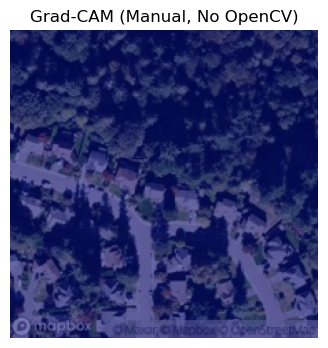

In [112]:
overlay = 0.5 * raw_img + 0.5 * heatmap
overlay = np.clip(overlay, 0, 1)

plt.figure(figsize=(4,4))
plt.imshow(overlay)
plt.axis("off")
plt.title("Grad-CAM (Manual, No OpenCV)")
plt.show()

In [113]:
fwd_handle.remove()
bwd_handle.remove()